In [1]:
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rcParams = {'font.size': 24 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

def get_LCA(df_taxa):
    if (len(df_taxa['species'].unique()) == 1):
        print(df_taxa['species'].unique())
        print(df_taxa)
        return 'species'
    elif (len(df_taxa['genus'].unique()) == 1):
        return 'genus'
    elif (len(df_taxa['family'].unique()) == 1):
        return 'family'
    elif (len(df_taxa['order'].unique()) == 1):
        return 'order'
    elif (len(df_taxa['class'].unique()) == 1):
        return 'class'
    elif (len(df_taxa['phylum'].unique()) == 1):
        return 'phylum'
    else:
        return 'kingdom'
    

In [2]:
accessory_Gene_MSA_path = '/Users/harihara/Mount/CMSC829A/Data/MSA_Stats/Accessory_Genes/'
op = []
for f in listdir(accessory_Gene_MSA_path):
    d = eval(open(accessory_Gene_MSA_path+f).read())
    d['Gene'] = f.replace(".txt","")
    d['Gene_Type'] = 'Accessory'
    op.append(d)
df_accessory_gene_MSA_stats = pd.DataFrame(op)

In [3]:
core_Gene_MSA_path = '/Users/harihara/Mount/CMSC829A/Data/MSA_Stats/Core_Genes/'
op = []
for f in listdir(core_Gene_MSA_path):
    d = eval(open(core_Gene_MSA_path+f).read())
    d['Gene'] = f.replace(".txt","")
    d['Gene_Type'] = 'Core'
    op.append(d)
df_core_gene_MSA_stats = pd.DataFrame(op)

In [4]:
df_MSA_Stats = pd.concat([df_accessory_gene_MSA_stats, df_core_gene_MSA_stats])
df_MSA_Stats.loc[df_MSA_Stats['Gene_Type']=='Core', 'Color_Id'] = 1
df_MSA_Stats.loc[df_MSA_Stats['Gene_Type']=='Accessory', 'Color_Id'] = 2


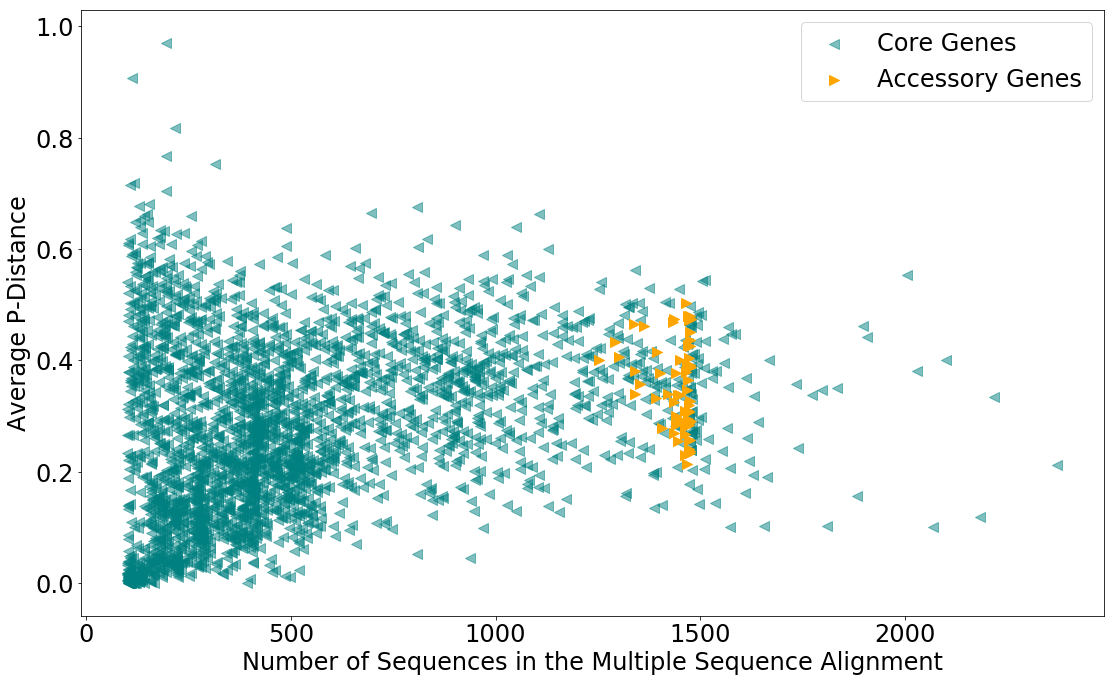

In [5]:
plt.rcParams.update(rcParams)
fig,ax = plt.subplots(1,1,figsize = (16,10))
df_MSA_Stats.loc[df_MSA_Stats['Gene_Type']=='Accessory'].plot.scatter('Num_Seqs', 'Median_P_Dist', color = 'teal', 
                                                                      ax = ax, alpha = 0.5, s = 100, marker = '<',
                                                                      label = 'Core Genes')
df_MSA_Stats.loc[df_MSA_Stats['Gene_Type']=='Core'].plot.scatter('Num_Seqs', 'Median_P_Dist', color = 'orange', 
                                                                 ax = ax, alpha = 1, s = 100, marker = '>',
                                                                 label = 'Accessory Genes')
ax.legend()
ax.set_xlabel('Number of Sequences in the Multiple Sequence Alignment')
ax.set_ylabel('Average P-Distance')
#ax.set_xscale('log')
fig.tight_layout()
fig.savefig('../Plots/MSA-Avg-P-Dist.pdf')

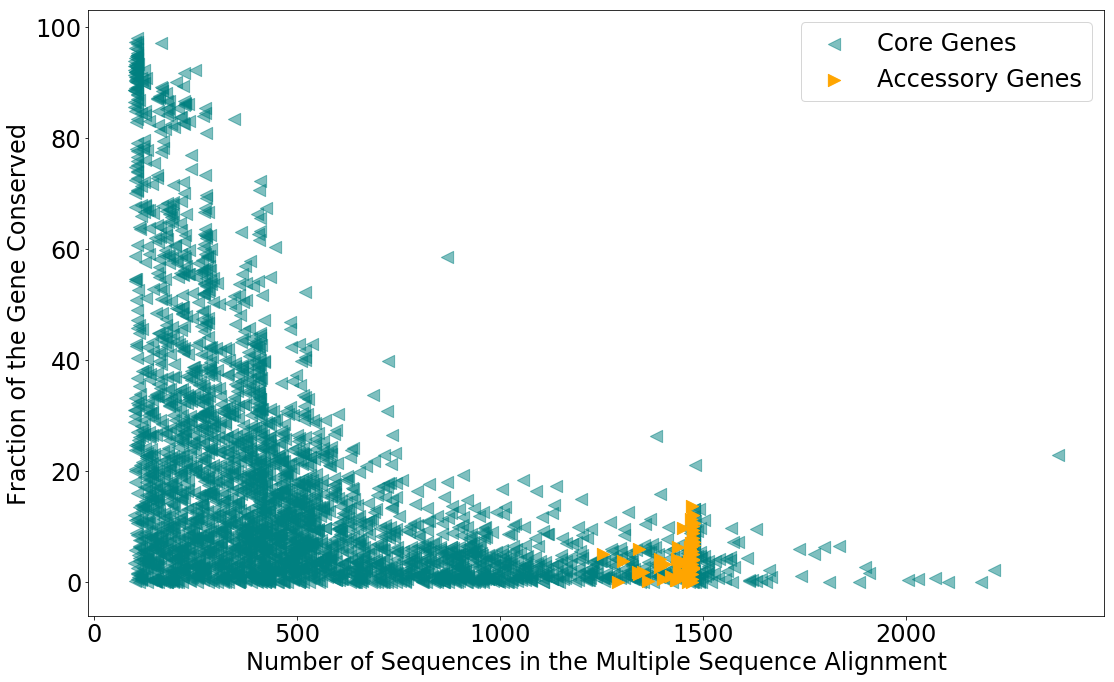

In [6]:
fig,ax = plt.subplots(1,1,figsize = (16,10))
df_MSA_Stats.loc[df_MSA_Stats['Gene_Type']=='Accessory'].plot.scatter('Num_Seqs', 'Frac_Conserved', color = 'teal', 
                                                                      ax = ax, alpha = 0.5, s = 150, marker = '<',
                                                                      label = 'Core Genes')
df_MSA_Stats.loc[df_MSA_Stats['Gene_Type']=='Core'].plot.scatter('Num_Seqs', 'Frac_Conserved', color = 'orange', 
                                                                 ax = ax, alpha = 1, s = 150, marker = '>',
                                                                 label = 'Accessory Genes')
ax.legend()
ax.set_xlabel('Number of Sequences in the Multiple Sequence Alignment')
ax.set_ylabel('Fraction of the Gene Conserved')
#ax.set_xscale('log')
fig.tight_layout() 
fig.savefig('../Plots/MSA-Frac-Conserved.pdf')

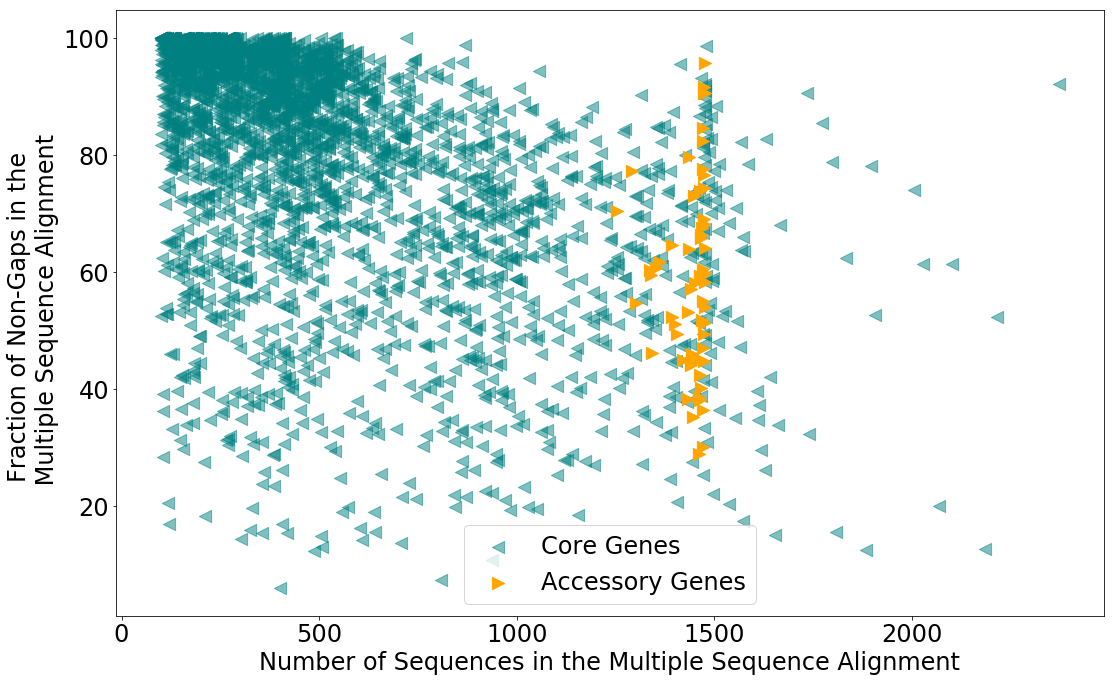

In [7]:
fig,ax = plt.subplots(1,1,figsize = (16,10))
df_MSA_Stats.loc[df_MSA_Stats['Gene_Type']=='Accessory'].plot.scatter('Num_Seqs', 'Frac_Non_Gaps', color = 'teal', 
                                                                      ax = ax, alpha = 0.5, s = 150, marker = '<',
                                                                      label = 'Core Genes')
df_MSA_Stats.loc[df_MSA_Stats['Gene_Type']=='Core'].plot.scatter('Num_Seqs', 'Frac_Non_Gaps', color = 'orange', 
                                                                 ax = ax, alpha = 1, s = 150,marker = '>',
                                                                 label = 'Accessory Genes')
ax.legend()
ax.set_xlabel('Number of Sequences in the Multiple Sequence Alignment')
ax.set_ylabel('Fraction of Non-Gaps in the \n Multiple Sequence Alignment')
#ax.set_xscale('log')
fig.tight_layout() 
fig.savefig('../Plots/MSA-Frac-NonGaps.pdf')

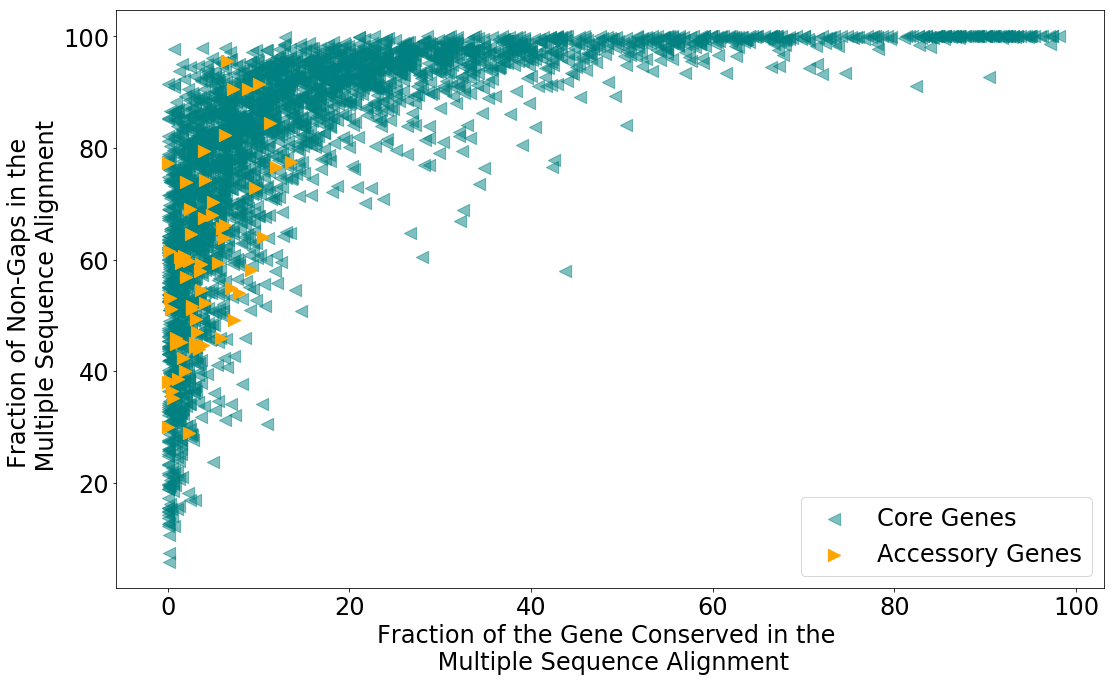

In [8]:
fig,ax = plt.subplots(1,1,figsize = (16,10))
df_MSA_Stats.loc[df_MSA_Stats['Gene_Type']=='Accessory'].plot.scatter('Frac_Conserved', 'Frac_Non_Gaps', color = 'teal', 
                                                                      ax = ax, alpha = 0.5, s = 150, marker = '<',
                                                                      label = 'Core Genes')
df_MSA_Stats.loc[df_MSA_Stats['Gene_Type']=='Core'].plot.scatter('Frac_Conserved', 'Frac_Non_Gaps', color = 'orange', 
                                                                 ax = ax, alpha = 1, s = 150,marker = '>',
                                                                 label = 'Accessory Genes')
ax.legend()
ax.set_xlabel('Fraction of the Gene Conserved in the \n Multiple Sequence Alignment')
ax.set_ylabel('Fraction of Non-Gaps in the \n Multiple Sequence Alignment')
#ax.set_xscale('log')
fig.tight_layout() 
fig.savefig('../Plots/MSA-Conserved-Vs-NonGaps.pdf')

In [9]:
accessory_genes = eval(open('/Users/harihara/Mount/CMSC829A/Data/Accessory_Genes.txt').read())
df_taxa = pd.read_csv('/Users/harihara/Mount/CMSC829A/Data/Taxonomy_Core_Genomes.txt', sep = ',', 
                      index_col='Tree_Leaves')
gene_dict = {}
for s in accessory_genes:
    genes = accessory_genes[s]
    for g in genes:
        try:
            gene_dict[g].append(s)
        except KeyError:
            gene_dict[g] = [s]
            
accessory_gene_list = listdir(accessory_Gene_MSA_path)
op = []
for a in accessory_gene_list:
    a = a.replace(".txt","").replace("_","/")
    samples = gene_dict[a]
    df_taxa_filter = df_taxa.loc[samples]
    #df_taxa_filter = df_taxa_filter[df_taxa_filter['species'] != 'Salmonella enterica']
    if len(df_taxa_filter['species'].unique()) == 1:
        continue
    d = {'Gene':a.replace("/","_"), 'Gene_Counts':len(df_taxa_filter), 'LCA':get_LCA(df_taxa_filter), 
         'Unique_Species': len(df_taxa_filter['species'].unique())}
    print(d)
    op.append(d)
df_accessory_genes_LCA = pd.DataFrame(data = op)

{'Gene': 'merR', 'Gene_Counts': 158, 'LCA': 'kingdom', 'Unique_Species': 65}
{'Gene': 'trpS', 'Gene_Counts': 1575, 'LCA': 'kingdom', 'Unique_Species': 286}
{'Gene': 'rlmD', 'Gene_Counts': 1559, 'LCA': 'kingdom', 'Unique_Species': 268}
{'Gene': 'flhC', 'Gene_Counts': 475, 'LCA': 'phylum', 'Unique_Species': 83}
{'Gene': 'icmH', 'Gene_Counts': 414, 'LCA': 'phylum', 'Unique_Species': 86}
{'Gene': 'fhuF', 'Gene_Counts': 381, 'LCA': 'phylum', 'Unique_Species': 64}
{'Gene': 'pduM', 'Gene_Counts': 199, 'LCA': 'kingdom', 'Unique_Species': 25}
{'Gene': 'sdiA', 'Gene_Counts': 281, 'LCA': 'order', 'Unique_Species': 36}
{'Gene': 'fabK', 'Gene_Counts': 102, 'LCA': 'phylum', 'Unique_Species': 27}
{'Gene': 'secY', 'Gene_Counts': 1501, 'LCA': 'kingdom', 'Unique_Species': 326}
{'Gene': 'clpP', 'Gene_Counts': 1270, 'LCA': 'kingdom', 'Unique_Species': 265}
{'Gene': 'merA', 'Gene_Counts': 165, 'LCA': 'kingdom', 'Unique_Species': 71}
{'Gene': 'ybfF', 'Gene_Counts': 396, 'LCA': 'order', 'Unique_Species': 63}

{'Gene': 'ccoN', 'Gene_Counts': 423, 'LCA': 'kingdom', 'Unique_Species': 76}
{'Gene': 'hydN', 'Gene_Counts': 328, 'LCA': 'order', 'Unique_Species': 47}
{'Gene': 'hutH', 'Gene_Counts': 938, 'LCA': 'kingdom', 'Unique_Species': 190}
{'Gene': 'phnS', 'Gene_Counts': 170, 'LCA': 'phylum', 'Unique_Species': 19}
{'Gene': 'trpB', 'Gene_Counts': 1411, 'LCA': 'kingdom', 'Unique_Species': 281}
{'Gene': 'pabC', 'Gene_Counts': 648, 'LCA': 'kingdom', 'Unique_Species': 126}
{'Gene': 'bglG', 'Gene_Counts': 123, 'LCA': 'order', 'Unique_Species': 30}
{'Gene': 'uspC', 'Gene_Counts': 315, 'LCA': 'order', 'Unique_Species': 43}
{'Gene': 'plaP', 'Gene_Counts': 223, 'LCA': 'family', 'Unique_Species': 23}
{'Gene': 'phsB', 'Gene_Counts': 122, 'LCA': 'family', 'Unique_Species': 5}
{'Gene': 'mngB', 'Gene_Counts': 116, 'LCA': 'kingdom', 'Unique_Species': 33}
{'Gene': 'ptsH', 'Gene_Counts': 462, 'LCA': 'kingdom', 'Unique_Species': 80}
{'Gene': 'thrS', 'Gene_Counts': 1513, 'LCA': 'kingdom', 'Unique_Species': 315}
{'G

{'Gene': 'rlmF', 'Gene_Counts': 527, 'LCA': 'kingdom', 'Unique_Species': 99}
{'Gene': 'dhaL', 'Gene_Counts': 641, 'LCA': 'kingdom', 'Unique_Species': 136}
{'Gene': 'mlaA', 'Gene_Counts': 407, 'LCA': 'order', 'Unique_Species': 65}
{'Gene': 'istA', 'Gene_Counts': 1030, 'LCA': 'kingdom', 'Unique_Species': 110}
{'Gene': 'degP', 'Gene_Counts': 381, 'LCA': 'class', 'Unique_Species': 59}
{'Gene': 'kynB', 'Gene_Counts': 144, 'LCA': 'kingdom', 'Unique_Species': 41}
{'Gene': 'gapA', 'Gene_Counts': 425, 'LCA': 'class', 'Unique_Species': 66}
{'Gene': 'fes', 'Gene_Counts': 371, 'LCA': 'kingdom', 'Unique_Species': 55}
{'Gene': 'glcC', 'Gene_Counts': 101, 'LCA': 'phylum', 'Unique_Species': 22}
{'Gene': 'fucO', 'Gene_Counts': 546, 'LCA': 'kingdom', 'Unique_Species': 65}
{'Gene': 'eptB', 'Gene_Counts': 387, 'LCA': 'order', 'Unique_Species': 59}
{'Gene': 'dtd', 'Gene_Counts': 880, 'LCA': 'kingdom', 'Unique_Species': 239}
{'Gene': 'eco', 'Gene_Counts': 454, 'LCA': 'phylum', 'Unique_Species': 77}
{'Gene':

{'Gene': 'stdB', 'Gene_Counts': 113, 'LCA': 'family', 'Unique_Species': 2}
{'Gene': 'gcl', 'Gene_Counts': 283, 'LCA': 'kingdom', 'Unique_Species': 52}
{'Gene': 'cobN', 'Gene_Counts': 248, 'LCA': 'kingdom', 'Unique_Species': 60}
{'Gene': 'murE', 'Gene_Counts': 570, 'LCA': 'kingdom', 'Unique_Species': 106}
{'Gene': 'mtr', 'Gene_Counts': 504, 'LCA': 'kingdom', 'Unique_Species': 80}
{'Gene': 'yjfN', 'Gene_Counts': 161, 'LCA': 'family', 'Unique_Species': 31}
{'Gene': 'hscA', 'Gene_Counts': 722, 'LCA': 'kingdom', 'Unique_Species': 146}
{'Gene': 'rpsK', 'Gene_Counts': 1479, 'LCA': 'kingdom', 'Unique_Species': 326}
{'Gene': 'puuE', 'Gene_Counts': 514, 'LCA': 'kingdom', 'Unique_Species': 109}
{'Gene': 'sctW', 'Gene_Counts': 117, 'LCA': 'phylum', 'Unique_Species': 38}
{'Gene': 'gbpA', 'Gene_Counts': 117, 'LCA': 'phylum', 'Unique_Species': 32}
{'Gene': 'rpoC', 'Gene_Counts': 1368, 'LCA': 'kingdom', 'Unique_Species': 300}
{'Gene': 'lpxH', 'Gene_Counts': 565, 'LCA': 'phylum', 'Unique_Species': 97}


{'Gene': 'adiA', 'Gene_Counts': 198, 'LCA': 'class', 'Unique_Species': 18}
{'Gene': 'plsY', 'Gene_Counts': 1212, 'LCA': 'kingdom', 'Unique_Species': 262}
{'Gene': 'pptA', 'Gene_Counts': 190, 'LCA': 'class', 'Unique_Species': 39}
{'Gene': 'ubiC', 'Gene_Counts': 415, 'LCA': 'phylum', 'Unique_Species': 67}
{'Gene': 'fimZ', 'Gene_Counts': 204, 'LCA': 'family', 'Unique_Species': 20}
{'Gene': 'flgB', 'Gene_Counts': 944, 'LCA': 'kingdom', 'Unique_Species': 167}
{'Gene': 'gcvT', 'Gene_Counts': 1174, 'LCA': 'kingdom', 'Unique_Species': 236}
{'Gene': 'rne', 'Gene_Counts': 585, 'LCA': 'phylum', 'Unique_Species': 111}
{'Gene': 'potE', 'Gene_Counts': 359, 'LCA': 'kingdom', 'Unique_Species': 61}
{'Gene': 'rcsC', 'Gene_Counts': 406, 'LCA': 'order', 'Unique_Species': 65}
{'Gene': 'tcyJ', 'Gene_Counts': 392, 'LCA': 'phylum', 'Unique_Species': 60}
{'Gene': 'eutN', 'Gene_Counts': 216, 'LCA': 'order', 'Unique_Species': 21}
{'Gene': 'fliG', 'Gene_Counts': 849, 'LCA': 'kingdom', 'Unique_Species': 166}
{'Gen

{'Gene': 'mprF', 'Gene_Counts': 487, 'LCA': 'kingdom', 'Unique_Species': 107}
{'Gene': 'purN', 'Gene_Counts': 1103, 'LCA': 'kingdom', 'Unique_Species': 265}
{'Gene': 'accD', 'Gene_Counts': 798, 'LCA': 'kingdom', 'Unique_Species': 211}
{'Gene': 'hybD', 'Gene_Counts': 132, 'LCA': 'phylum', 'Unique_Species': 3}
{'Gene': 'recX', 'Gene_Counts': 1140, 'LCA': 'kingdom', 'Unique_Species': 240}
{'Gene': 'yhaM', 'Gene_Counts': 135, 'LCA': 'order', 'Unique_Species': 35}
{'Gene': 'ttrB', 'Gene_Counts': 196, 'LCA': 'class', 'Unique_Species': 25}
{'Gene': 'fahA', 'Gene_Counts': 229, 'LCA': 'kingdom', 'Unique_Species': 62}
{'Gene': 'menI', 'Gene_Counts': 332, 'LCA': 'order', 'Unique_Species': 48}
{'Gene': 'kch', 'Gene_Counts': 131, 'LCA': 'phylum', 'Unique_Species': 28}
{'Gene': 'fliR', 'Gene_Counts': 901, 'LCA': 'kingdom', 'Unique_Species': 162}
{'Gene': 'dcuC', 'Gene_Counts': 705, 'LCA': 'kingdom', 'Unique_Species': 88}
{'Gene': 'pncB', 'Gene_Counts': 869, 'LCA': 'kingdom', 'Unique_Species': 167}
{

{'Gene': 'btuF', 'Gene_Counts': 458, 'LCA': 'class', 'Unique_Species': 77}
{'Gene': 'atzF', 'Gene_Counts': 280, 'LCA': 'kingdom', 'Unique_Species': 69}
{'Gene': 'fapR', 'Gene_Counts': 139, 'LCA': 'phylum', 'Unique_Species': 36}
{'Gene': 'acnD', 'Gene_Counts': 347, 'LCA': 'phylum', 'Unique_Species': 79}
{'Gene': 'kdsA', 'Gene_Counts': 1033, 'LCA': 'kingdom', 'Unique_Species': 208}
{'Gene': 'ribE', 'Gene_Counts': 884, 'LCA': 'kingdom', 'Unique_Species': 168}
{'Gene': 'thrB', 'Gene_Counts': 704, 'LCA': 'kingdom', 'Unique_Species': 170}
{'Gene': 'dusB', 'Gene_Counts': 1322, 'LCA': 'kingdom', 'Unique_Species': 296}
{'Gene': 'potA', 'Gene_Counts': 779, 'LCA': 'kingdom', 'Unique_Species': 141}
{'Gene': 'tus', 'Gene_Counts': 259, 'LCA': 'order', 'Unique_Species': 59}
{'Gene': 'raiA', 'Gene_Counts': 1424, 'LCA': 'kingdom', 'Unique_Species': 311}
{'Gene': 'madL', 'Gene_Counts': 129, 'LCA': 'kingdom', 'Unique_Species': 34}
{'Gene': 'fucP', 'Gene_Counts': 664, 'LCA': 'kingdom', 'Unique_Species': 8

{'Gene': 'prpF', 'Gene_Counts': 353, 'LCA': 'kingdom', 'Unique_Species': 80}
{'Gene': 'pilG', 'Gene_Counts': 162, 'LCA': 'phylum', 'Unique_Species': 32}
{'Gene': 'glpQ', 'Gene_Counts': 493, 'LCA': 'kingdom', 'Unique_Species': 88}
{'Gene': 'aguB', 'Gene_Counts': 166, 'LCA': 'kingdom', 'Unique_Species': 41}
{'Gene': 'yoeI', 'Gene_Counts': 248, 'LCA': 'family', 'Unique_Species': 34}
{'Gene': 'yacG', 'Gene_Counts': 679, 'LCA': 'phylum', 'Unique_Species': 131}
{'Gene': 'rbsA', 'Gene_Counts': 491, 'LCA': 'kingdom', 'Unique_Species': 87}
{'Gene': 'tusB', 'Gene_Counts': 533, 'LCA': 'kingdom', 'Unique_Species': 100}
{'Gene': 'coaE', 'Gene_Counts': 931, 'LCA': 'kingdom', 'Unique_Species': 259}
{'Gene': 'tsaE', 'Gene_Counts': 1406, 'LCA': 'kingdom', 'Unique_Species': 314}
{'Gene': 'aat', 'Gene_Counts': 692, 'LCA': 'kingdom', 'Unique_Species': 163}
{'Gene': 'sapD', 'Gene_Counts': 405, 'LCA': 'order', 'Unique_Species': 65}
{'Gene': 'menB', 'Gene_Counts': 715, 'LCA': 'kingdom', 'Unique_Species': 145

{'Gene': 'rsgA', 'Gene_Counts': 1489, 'LCA': 'kingdom', 'Unique_Species': 300}
{'Gene': 'mug', 'Gene_Counts': 361, 'LCA': 'kingdom', 'Unique_Species': 58}
{'Gene': 'fliS', 'Gene_Counts': 854, 'LCA': 'kingdom', 'Unique_Species': 144}
{'Gene': 'yddG', 'Gene_Counts': 534, 'LCA': 'kingdom', 'Unique_Species': 101}
{'Gene': 'panS', 'Gene_Counts': 215, 'LCA': 'order', 'Unique_Species': 38}
{'Gene': 'araA', 'Gene_Counts': 525, 'LCA': 'kingdom', 'Unique_Species': 104}
{'Gene': 'bfd', 'Gene_Counts': 403, 'LCA': 'class', 'Unique_Species': 64}
{'Gene': 'glnG', 'Gene_Counts': 520, 'LCA': 'class', 'Unique_Species': 94}
{'Gene': 'csgC', 'Gene_Counts': 218, 'LCA': 'family', 'Unique_Species': 23}
{'Gene': 'panB', 'Gene_Counts': 1197, 'LCA': 'kingdom', 'Unique_Species': 247}
{'Gene': 'hyi', 'Gene_Counts': 287, 'LCA': 'phylum', 'Unique_Species': 51}
{'Gene': 'tig', 'Gene_Counts': 959, 'LCA': 'kingdom', 'Unique_Species': 263}
{'Gene': 'mtnA', 'Gene_Counts': 458, 'LCA': 'kingdom', 'Unique_Species': 99}
{'G

{'Gene': 'dgt', 'Gene_Counts': 485, 'LCA': 'kingdom', 'Unique_Species': 88}
{'Gene': 'glxR', 'Gene_Counts': 184, 'LCA': 'phylum', 'Unique_Species': 25}
{'Gene': 'ushA', 'Gene_Counts': 265, 'LCA': 'class', 'Unique_Species': 71}
{'Gene': 'kdsC', 'Gene_Counts': 483, 'LCA': 'class', 'Unique_Species': 81}
{'Gene': 'hpaA', 'Gene_Counts': 295, 'LCA': 'class', 'Unique_Species': 48}
{'Gene': 'rpsF', 'Gene_Counts': 1238, 'LCA': 'kingdom', 'Unique_Species': 293}
{'Gene': 'mmuM', 'Gene_Counts': 407, 'LCA': 'kingdom', 'Unique_Species': 95}
{'Gene': 'eutB', 'Gene_Counts': 255, 'LCA': 'phylum', 'Unique_Species': 36}
{'Gene': 'qseG', 'Gene_Counts': 408, 'LCA': 'order', 'Unique_Species': 65}
{'Gene': 'trpL', 'Gene_Counts': 237, 'LCA': 'kingdom', 'Unique_Species': 28}
{'Gene': 'acrD', 'Gene_Counts': 347, 'LCA': 'order', 'Unique_Species': 52}
{'Gene': 'maf', 'Gene_Counts': 954, 'LCA': 'kingdom', 'Unique_Species': 178}
{'Gene': 'gspL', 'Gene_Counts': 357, 'LCA': 'phylum', 'Unique_Species': 86}
{'Gene': 'm

{'Gene': 'argR', 'Gene_Counts': 902, 'LCA': 'kingdom', 'Unique_Species': 177}
{'Gene': 'xthA', 'Gene_Counts': 595, 'LCA': 'class', 'Unique_Species': 110}
{'Gene': 'yfbR', 'Gene_Counts': 507, 'LCA': 'class', 'Unique_Species': 85}
{'Gene': 'bioD', 'Gene_Counts': 1553, 'LCA': 'kingdom', 'Unique_Species': 240}
{'Gene': 'rpmD', 'Gene_Counts': 1455, 'LCA': 'kingdom', 'Unique_Species': 321}
{'Gene': 'kefG', 'Gene_Counts': 463, 'LCA': 'class', 'Unique_Species': 78}
{'Gene': 'cspF', 'Gene_Counts': 158, 'LCA': 'order', 'Unique_Species': 18}
{'Gene': 'hxlA', 'Gene_Counts': 173, 'LCA': 'kingdom', 'Unique_Species': 35}
{'Gene': 'dcuA', 'Gene_Counts': 191, 'LCA': 'phylum', 'Unique_Species': 15}
{'Gene': 'thiP', 'Gene_Counts': 536, 'LCA': 'phylum', 'Unique_Species': 98}
{'Gene': 'nuoJ', 'Gene_Counts': 530, 'LCA': 'phylum', 'Unique_Species': 94}
{'Gene': 'phnW', 'Gene_Counts': 284, 'LCA': 'kingdom', 'Unique_Species': 52}
{'Gene': 'tdh', 'Gene_Counts': 701, 'LCA': 'kingdom', 'Unique_Species': 129}
{'Ge

{'Gene': 'tag', 'Gene_Counts': 327, 'LCA': 'kingdom', 'Unique_Species': 44}
{'Gene': 'hflD', 'Gene_Counts': 695, 'LCA': 'class', 'Unique_Species': 126}
{'Gene': 'rplC', 'Gene_Counts': 1442, 'LCA': 'kingdom', 'Unique_Species': 323}
{'Gene': 'menD', 'Gene_Counts': 667, 'LCA': 'kingdom', 'Unique_Species': 149}
{'Gene': 'malZ', 'Gene_Counts': 360, 'LCA': 'class', 'Unique_Species': 56}
{'Gene': 'dltC', 'Gene_Counts': 372, 'LCA': 'kingdom', 'Unique_Species': 92}
{'Gene': 'rpsC', 'Gene_Counts': 1439, 'LCA': 'kingdom', 'Unique_Species': 315}
{'Gene': 'hslU', 'Gene_Counts': 1134, 'LCA': 'kingdom', 'Unique_Species': 236}
{'Gene': 'dgoR', 'Gene_Counts': 202, 'LCA': 'order', 'Unique_Species': 36}
{'Gene': 'rssB', 'Gene_Counts': 407, 'LCA': 'order', 'Unique_Species': 65}
{'Gene': 'cecR', 'Gene_Counts': 363, 'LCA': 'order', 'Unique_Species': 55}
{'Gene': 'pduG', 'Gene_Counts': 123, 'LCA': 'family', 'Unique_Species': 5}
{'Gene': 'fepE', 'Gene_Counts': 258, 'LCA': 'order', 'Unique_Species': 36}
{'Gene

{'Gene': 'yihA', 'Gene_Counts': 612, 'LCA': 'kingdom', 'Unique_Species': 217}
{'Gene': 'ybgI', 'Gene_Counts': 190, 'LCA': 'family', 'Unique_Species': 16}
{'Gene': 'racE', 'Gene_Counts': 307, 'LCA': 'class', 'Unique_Species': 72}
{'Gene': 'malX', 'Gene_Counts': 224, 'LCA': 'kingdom', 'Unique_Species': 50}
{'Gene': 'yhbO', 'Gene_Counts': 156, 'LCA': 'family', 'Unique_Species': 7}
{'Gene': 'gutM', 'Gene_Counts': 306, 'LCA': 'class', 'Unique_Species': 43}
{'Gene': 'atpE', 'Gene_Counts': 1225, 'LCA': 'kingdom', 'Unique_Species': 261}
{'Gene': 'exuR', 'Gene_Counts': 282, 'LCA': 'class', 'Unique_Species': 60}
{'Gene': 'cnoX', 'Gene_Counts': 161, 'LCA': 'family', 'Unique_Species': 8}
{'Gene': 'cas2', 'Gene_Counts': 506, 'LCA': 'kingdom', 'Unique_Species': 123}
{'Gene': 'rplT', 'Gene_Counts': 1476, 'LCA': 'kingdom', 'Unique_Species': 325}
{'Gene': 'rraB', 'Gene_Counts': 522, 'LCA': 'class', 'Unique_Species': 93}
{'Gene': 'pabA', 'Gene_Counts': 345, 'LCA': 'kingdom', 'Unique_Species': 52}
{'Gene

{'Gene': 'mlaF', 'Gene_Counts': 514, 'LCA': 'class', 'Unique_Species': 92}
{'Gene': 'hemN', 'Gene_Counts': 876, 'LCA': 'kingdom', 'Unique_Species': 172}
{'Gene': 'wzzB', 'Gene_Counts': 232, 'LCA': 'order', 'Unique_Species': 28}
{'Gene': 'fliH', 'Gene_Counts': 646, 'LCA': 'kingdom', 'Unique_Species': 127}
{'Gene': 'truA', 'Gene_Counts': 1528, 'LCA': 'kingdom', 'Unique_Species': 325}
{'Gene': 'erpA', 'Gene_Counts': 959, 'LCA': 'kingdom', 'Unique_Species': 190}
{'Gene': 'btsT', 'Gene_Counts': 201, 'LCA': 'family', 'Unique_Species': 20}
{'Gene': 'secB', 'Gene_Counts': 960, 'LCA': 'phylum', 'Unique_Species': 188}
{'Gene': 'eutQ', 'Gene_Counts': 214, 'LCA': 'order', 'Unique_Species': 21}
{'Gene': 'lpxP', 'Gene_Counts': 376, 'LCA': 'order', 'Unique_Species': 56}
{'Gene': 'ccmA', 'Gene_Counts': 828, 'LCA': 'kingdom', 'Unique_Species': 135}
{'Gene': 'nudB', 'Gene_Counts': 513, 'LCA': 'phylum', 'Unique_Species': 96}
{'Gene': 'slyB', 'Gene_Counts': 289, 'LCA': 'order', 'Unique_Species': 37}
{'Gen

{'Gene': 'gltA', 'Gene_Counts': 432, 'LCA': 'kingdom', 'Unique_Species': 91}
{'Gene': 'ycjG', 'Gene_Counts': 411, 'LCA': 'class', 'Unique_Species': 62}
{'Gene': 'yfcD', 'Gene_Counts': 416, 'LCA': 'class', 'Unique_Species': 67}
{'Gene': 'slmA', 'Gene_Counts': 605, 'LCA': 'phylum', 'Unique_Species': 118}
{'Gene': 'leuL', 'Gene_Counts': 333, 'LCA': 'order', 'Unique_Species': 53}
{'Gene': 'secM', 'Gene_Counts': 420, 'LCA': 'class', 'Unique_Species': 73}
{'Gene': 'accB', 'Gene_Counts': 939, 'LCA': 'kingdom', 'Unique_Species': 238}
{'Gene': 'hisA', 'Gene_Counts': 1085, 'LCA': 'kingdom', 'Unique_Species': 233}
{'Gene': 'sitC', 'Gene_Counts': 235, 'LCA': 'phylum', 'Unique_Species': 31}
{'Gene': 'rfaJ', 'Gene_Counts': 129, 'LCA': 'family', 'Unique_Species': 5}
{'Gene': 'potG', 'Gene_Counts': 363, 'LCA': 'order', 'Unique_Species': 55}
{'Gene': 'napC', 'Gene_Counts': 256, 'LCA': 'phylum', 'Unique_Species': 34}
{'Gene': 'iroC', 'Gene_Counts': 126, 'LCA': 'family', 'Unique_Species': 8}
{'Gene': 'dc

{'Gene': 'yhaJ', 'Gene_Counts': 212, 'LCA': 'family', 'Unique_Species': 23}
{'Gene': 'fruK', 'Gene_Counts': 440, 'LCA': 'class', 'Unique_Species': 70}
{'Gene': 'kdgT', 'Gene_Counts': 240, 'LCA': 'kingdom', 'Unique_Species': 45}
{'Gene': 'dpaL', 'Gene_Counts': 236, 'LCA': 'kingdom', 'Unique_Species': 37}
{'Gene': 'asnA', 'Gene_Counts': 443, 'LCA': 'kingdom', 'Unique_Species': 104}
{'Gene': 'cheZ', 'Gene_Counts': 429, 'LCA': 'phylum', 'Unique_Species': 74}
{'Gene': 'mgtE', 'Gene_Counts': 969, 'LCA': 'kingdom', 'Unique_Species': 203}
{'Gene': 'nagC', 'Gene_Counts': 166, 'LCA': 'family', 'Unique_Species': 10}
{'Gene': 'fliD', 'Gene_Counts': 841, 'LCA': 'kingdom', 'Unique_Species': 140}
{'Gene': 'pyrE', 'Gene_Counts': 1074, 'LCA': 'kingdom', 'Unique_Species': 255}
{'Gene': 'proY', 'Gene_Counts': 381, 'LCA': 'class', 'Unique_Species': 59}
{'Gene': 'mlaE', 'Gene_Counts': 743, 'LCA': 'phylum', 'Unique_Species': 150}
{'Gene': 'mgtR', 'Gene_Counts': 128, 'LCA': 'family', 'Unique_Species': 6}
{'G

{'Gene': 'wecB', 'Gene_Counts': 1138, 'LCA': 'kingdom', 'Unique_Species': 240}
{'Gene': 'tuf', 'Gene_Counts': 2373, 'LCA': 'kingdom', 'Unique_Species': 325}
{'Gene': 'galT', 'Gene_Counts': 648, 'LCA': 'kingdom', 'Unique_Species': 126}
{'Gene': 'dkgA', 'Gene_Counts': 391, 'LCA': 'order', 'Unique_Species': 62}
{'Gene': 'umuD', 'Gene_Counts': 595, 'LCA': 'kingdom', 'Unique_Species': 105}
{'Gene': 'rfaF', 'Gene_Counts': 406, 'LCA': 'order', 'Unique_Species': 65}
{'Gene': 'cybB', 'Gene_Counts': 350, 'LCA': 'class', 'Unique_Species': 53}
{'Gene': 'yqaB', 'Gene_Counts': 375, 'LCA': 'order', 'Unique_Species': 58}
{'Gene': 'malK', 'Gene_Counts': 415, 'LCA': 'kingdom', 'Unique_Species': 75}
{'Gene': 'rcsA', 'Gene_Counts': 307, 'LCA': 'order', 'Unique_Species': 42}
{'Gene': 'potI', 'Gene_Counts': 365, 'LCA': 'order', 'Unique_Species': 55}
{'Gene': 'rbsD', 'Gene_Counts': 821, 'LCA': 'kingdom', 'Unique_Species': 165}
{'Gene': 'mglC', 'Gene_Counts': 434, 'LCA': 'kingdom', 'Unique_Species': 72}
{'Gen

{'Gene': 'sapA', 'Gene_Counts': 459, 'LCA': 'phylum', 'Unique_Species': 79}
{'Gene': 'xdhB', 'Gene_Counts': 319, 'LCA': 'kingdom', 'Unique_Species': 74}
{'Gene': 'gor', 'Gene_Counts': 156, 'LCA': 'kingdom', 'Unique_Species': 42}
{'Gene': 'lpxL', 'Gene_Counts': 161, 'LCA': 'phylum', 'Unique_Species': 38}
{'Gene': 'pgpB', 'Gene_Counts': 379, 'LCA': 'order', 'Unique_Species': 60}
{'Gene': 'chbC', 'Gene_Counts': 330, 'LCA': 'order', 'Unique_Species': 47}
{'Gene': 'apbC', 'Gene_Counts': 856, 'LCA': 'phylum', 'Unique_Species': 165}
{'Gene': 'paaA', 'Gene_Counts': 340, 'LCA': 'kingdom', 'Unique_Species': 85}
{'Gene': 'mdcG', 'Gene_Counts': 132, 'LCA': 'phylum', 'Unique_Species': 29}
{'Gene': 'ftsH', 'Gene_Counts': 1565, 'LCA': 'kingdom', 'Unique_Species': 324}
{'Gene': 'mscS', 'Gene_Counts': 383, 'LCA': 'class', 'Unique_Species': 69}
{'Gene': 'gspD', 'Gene_Counts': 551, 'LCA': 'phylum', 'Unique_Species': 109}
{'Gene': 'tmcA', 'Gene_Counts': 160, 'LCA': 'family', 'Unique_Species': 8}
{'Gene': 

{'Gene': 'tusC', 'Gene_Counts': 576, 'LCA': 'class', 'Unique_Species': 105}
{'Gene': 'gntK', 'Gene_Counts': 605, 'LCA': 'kingdom', 'Unique_Species': 101}
{'Gene': 'sdaA', 'Gene_Counts': 332, 'LCA': 'phylum', 'Unique_Species': 47}
{'Gene': 'mgtA', 'Gene_Counts': 885, 'LCA': 'kingdom', 'Unique_Species': 147}
{'Gene': 'queA', 'Gene_Counts': 1335, 'LCA': 'kingdom', 'Unique_Species': 288}
{'Gene': 'yhgN', 'Gene_Counts': 115, 'LCA': 'family', 'Unique_Species': 22}
{'Gene': 'rsmB', 'Gene_Counts': 1227, 'LCA': 'kingdom', 'Unique_Species': 261}
{'Gene': 'glgS', 'Gene_Counts': 249, 'LCA': 'family', 'Unique_Species': 29}
{'Gene': 'tam', 'Gene_Counts': 323, 'LCA': 'phylum', 'Unique_Species': 75}
{'Gene': 'misL', 'Gene_Counts': 115, 'LCA': 'family', 'Unique_Species': 5}
{'Gene': 'arsB', 'Gene_Counts': 659, 'LCA': 'kingdom', 'Unique_Species': 163}
{'Gene': 'livH', 'Gene_Counts': 544, 'LCA': 'phylum', 'Unique_Species': 99}
{'Gene': 'pflA', 'Gene_Counts': 842, 'LCA': 'kingdom', 'Unique_Species': 173}


{'Gene': 'cybC', 'Gene_Counts': 384, 'LCA': 'class', 'Unique_Species': 57}
{'Gene': 'upp', 'Gene_Counts': 1434, 'LCA': 'kingdom', 'Unique_Species': 313}
{'Gene': 'yejB', 'Gene_Counts': 144, 'LCA': 'phylum', 'Unique_Species': 28}
{'Gene': 'thyA', 'Gene_Counts': 503, 'LCA': 'kingdom', 'Unique_Species': 92}
{'Gene': 'mlaC', 'Gene_Counts': 486, 'LCA': 'class', 'Unique_Species': 85}
{'Gene': 'flgC', 'Gene_Counts': 961, 'LCA': 'kingdom', 'Unique_Species': 169}
{'Gene': 'manA', 'Gene_Counts': 995, 'LCA': 'kingdom', 'Unique_Species': 182}
{'Gene': 'wrbA', 'Gene_Counts': 848, 'LCA': 'kingdom', 'Unique_Species': 145}
{'Gene': 'lolD', 'Gene_Counts': 825, 'LCA': 'phylum', 'Unique_Species': 157}
{'Gene': 'ubiK', 'Gene_Counts': 256, 'LCA': 'order', 'Unique_Species': 32}
{'Gene': 'yihI', 'Gene_Counts': 499, 'LCA': 'class', 'Unique_Species': 88}
{'Gene': 'rhtC', 'Gene_Counts': 392, 'LCA': 'class', 'Unique_Species': 63}
{'Gene': 'tyrR', 'Gene_Counts': 482, 'LCA': 'class', 'Unique_Species': 84}
{'Gene':

{'Gene': 'amiB', 'Gene_Counts': 391, 'LCA': 'class', 'Unique_Species': 62}
{'Gene': 'wcaD', 'Gene_Counts': 214, 'LCA': 'family', 'Unique_Species': 24}
{'Gene': 'cbiB', 'Gene_Counts': 217, 'LCA': 'kingdom', 'Unique_Species': 63}
{'Gene': 'btuD', 'Gene_Counts': 431, 'LCA': 'class', 'Unique_Species': 72}
{'Gene': 'holA', 'Gene_Counts': 1106, 'LCA': 'kingdom', 'Unique_Species': 275}
{'Gene': 'narH', 'Gene_Counts': 910, 'LCA': 'kingdom', 'Unique_Species': 140}
{'Gene': 'orn', 'Gene_Counts': 955, 'LCA': 'kingdom', 'Unique_Species': 191}
{'Gene': 'tusD', 'Gene_Counts': 634, 'LCA': 'class', 'Unique_Species': 121}
{'Gene': 'kynA', 'Gene_Counts': 200, 'LCA': 'kingdom', 'Unique_Species': 53}
{'Gene': 'ltrA', 'Gene_Counts': 888, 'LCA': 'kingdom', 'Unique_Species': 108}
{'Gene': 'lipB', 'Gene_Counts': 1061, 'LCA': 'kingdom', 'Unique_Species': 222}
{'Gene': 'cas5e', 'Gene_Counts': 220, 'LCA': 'kingdom', 'Unique_Species': 48}
{'Gene': 'gcvPA', 'Gene_Counts': 208, 'LCA': 'kingdom', 'Unique_Species': 5

{'Gene': 'ccoG', 'Gene_Counts': 380, 'LCA': 'kingdom', 'Unique_Species': 75}
{'Gene': 'rfaC', 'Gene_Counts': 432, 'LCA': 'class', 'Unique_Species': 72}
{'Gene': 'hyaB', 'Gene_Counts': 174, 'LCA': 'class', 'Unique_Species': 15}
{'Gene': 'pcrA', 'Gene_Counts': 445, 'LCA': 'kingdom', 'Unique_Species': 113}
{'Gene': 'qoxA', 'Gene_Counts': 115, 'LCA': 'order', 'Unique_Species': 28}
{'Gene': 'wzc', 'Gene_Counts': 285, 'LCA': 'order', 'Unique_Species': 40}
{'Gene': 'tsf', 'Gene_Counts': 891, 'LCA': 'kingdom', 'Unique_Species': 248}
{'Gene': 'rsuA', 'Gene_Counts': 517, 'LCA': 'class', 'Unique_Species': 92}
{'Gene': 'dhbA', 'Gene_Counts': 123, 'LCA': 'kingdom', 'Unique_Species': 32}
{'Gene': 'pduU', 'Gene_Counts': 185, 'LCA': 'order', 'Unique_Species': 18}
{'Gene': 'trmN', 'Gene_Counts': 182, 'LCA': 'family', 'Unique_Species': 14}
{'Gene': 'phnN', 'Gene_Counts': 395, 'LCA': 'kingdom', 'Unique_Species': 88}
{'Gene': 'lhgO', 'Gene_Counts': 375, 'LCA': 'kingdom', 'Unique_Species': 62}
{'Gene': 'pl

In [25]:
df_accessory_gene_LCA = pd.merge(df_accessory_gene_MSA_stats, df_accessory_genes_LCA, on = 'Gene', how = 'inner')

In [26]:
df_accessory_gene_LCA.loc[df_accessory_gene_LCA['LCA']=='kingdom', 'LCA_id'] = 2
df_accessory_gene_LCA.loc[df_accessory_gene_LCA['LCA']=='phylum', 'LCA_id'] = 3
df_accessory_gene_LCA.loc[df_accessory_gene_LCA['LCA']=='class', 'LCA_id'] = 4
df_accessory_gene_LCA.loc[df_accessory_gene_LCA['LCA']=='order', 'LCA_id'] = 5
df_accessory_gene_LCA.loc[df_accessory_gene_LCA['LCA']=='family', 'LCA_id'] = 6
df_accessory_gene_LCA.loc[df_accessory_gene_LCA['LCA']=='genus', 'LCA_id'] = 7
df_accessory_gene_LCA.loc[df_accessory_gene_LCA['LCA']=='species', 'LCA_id'] = 8

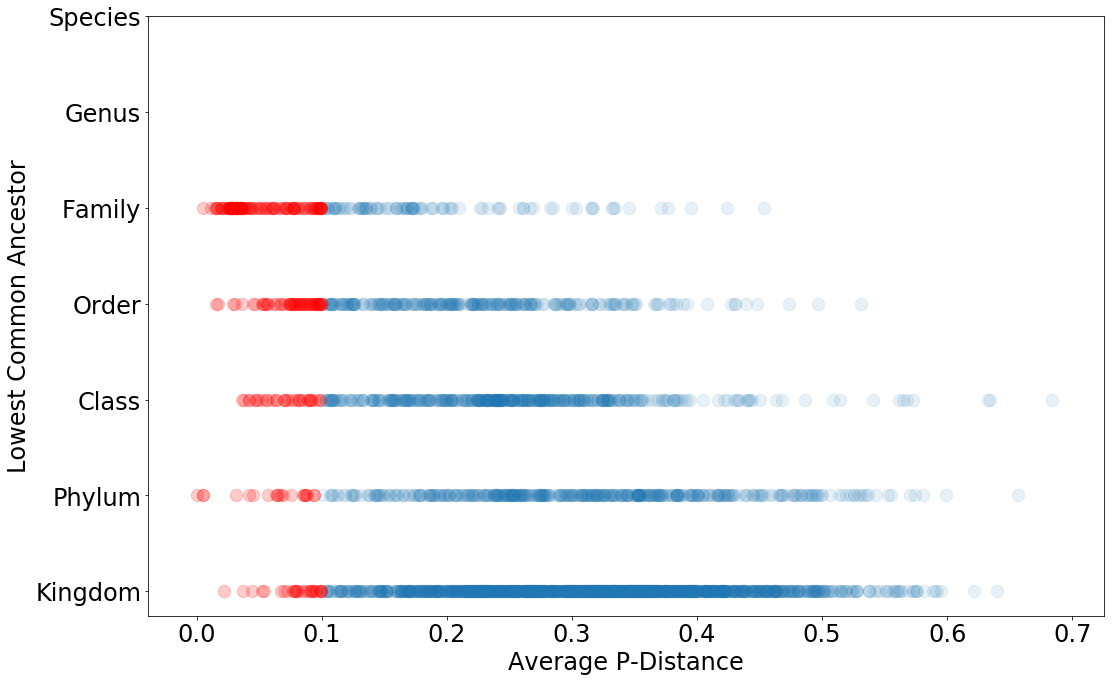

In [140]:
fig, ax = plt.subplots(1,1,figsize = (16,10))

df_accessory_gene_LCA[df_accessory_gene_LCA['Avg_P_Dist'] >= 0.1].plot.scatter('Avg_P_Dist', 'LCA_id', 
                                                                               ax = ax, s = 150, alpha = 0.1)
df_accessory_gene_LCA[df_accessory_gene_LCA['Avg_P_Dist'] < 0.1].plot.scatter('Avg_P_Dist', 'LCA_id',alpha = 0.2,
                                                                              ax = ax, s = 150, 
                                                                              color = 'red')
ax.set_xlabel('Average P-Distance')
ax.set_ylabel('Lowest Common Ancestor')
ax.set_yticks([2,3,4,5,6,7,8])
ax.set_yticklabels(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'])
fig.tight_layout()
#fig.savefig('../Plots/LCA-Avg-P-Distance.pdf')

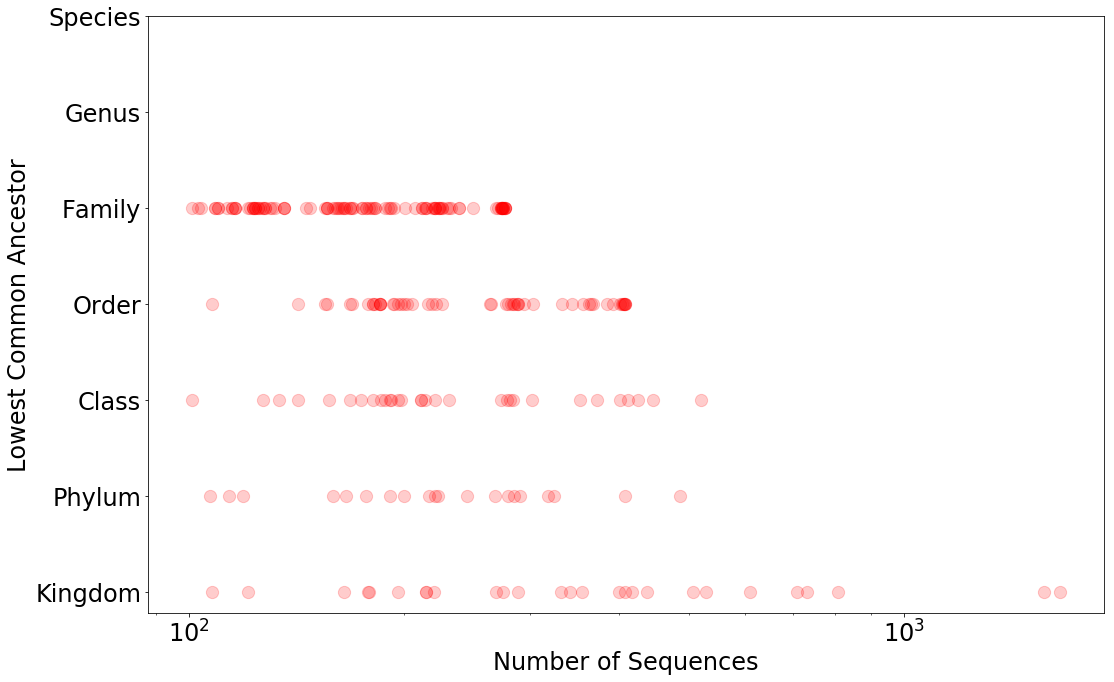

In [141]:
fig,ax = plt.subplots(1,1,figsize = (16,10))
df_accessory_gene_LCA[df_accessory_gene_LCA['Avg_P_Dist'] < 0.1].plot.scatter('Num_Seqs', 'LCA_id',alpha = 0.2,
                                                                             s = 150, color = 'red', ax = ax)
ax.set_xlabel('Number of Sequences')
ax.set_ylabel('Lowest Common Ancestor')
ax.set_yticks([2,3,4,5,6,7,8])
ax.set_xscale('log')
ax.set_yticklabels(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'])
fig.tight_layout()
#fig.savefig('../Plots/LCA-Num_Seqs.pdf')